# TASK 4:
 1.Choose a binary classification dataset.

 2.Train/test split and standardize features.

 3.Fit a Logistic Regression model.

 4.Evaluate with confusion matrix, precision, reca l, ROC-AUC.

 5.Tune threshold and explain sigmoid function

# Sigmoid Function

It applies a sigmoid function in logistic regression to map the output of a linear equation to a 0-1 probability value. It has a formula of σ(z) = 1 / (1 + exp(-z)) where z = weighted input features + a bias term. The sigmoid function serves to translate a model’s output as a likelihood of an input being in a positive class.

After computing this probability, a classification decision is made using a threshold, typically 0.5. If a probability is more than or equal to this threshold, then the instance is labeled as the positive class; otherwise, as the negative class.

Adjustment of the threshold has an influence on model behavior. Raising the threshold renders the model more conservative in its positive predictions, resulting in higher precision but lower recall. Lowering the threshold makes the model more apt to call instances positive, but this decreases precision while enhancing recall. The optimal threshold varies depending on the aims of a given application.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score

# Data Loading

In [2]:
df = pd.read_csv('data.csv')
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (569, 33)


In [3]:
display(df.head())
display(df.describe())
display(df.info())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

# Data Preprocessing

<Axes: >

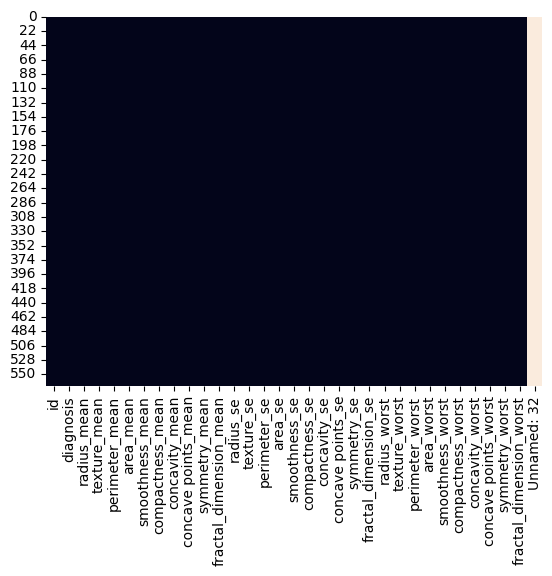

In [4]:
sns.heatmap(df.isnull(), cbar=False)

In [5]:
missing_values = df.isnull().sum()
print("\nMissing Values per column:\n", missing_values)


Missing Values per column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

In [6]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [7]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


# EDA

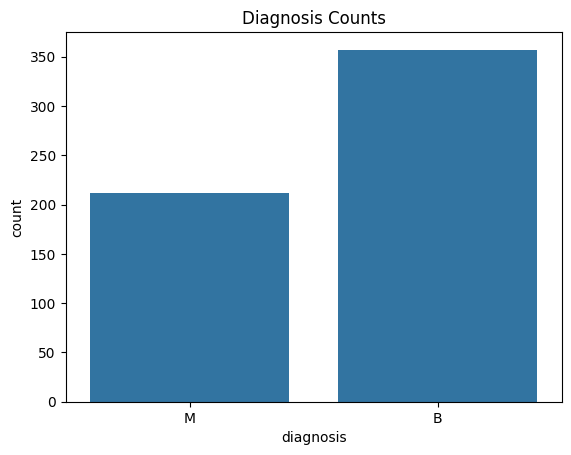

In [8]:
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Counts')
plt.show()

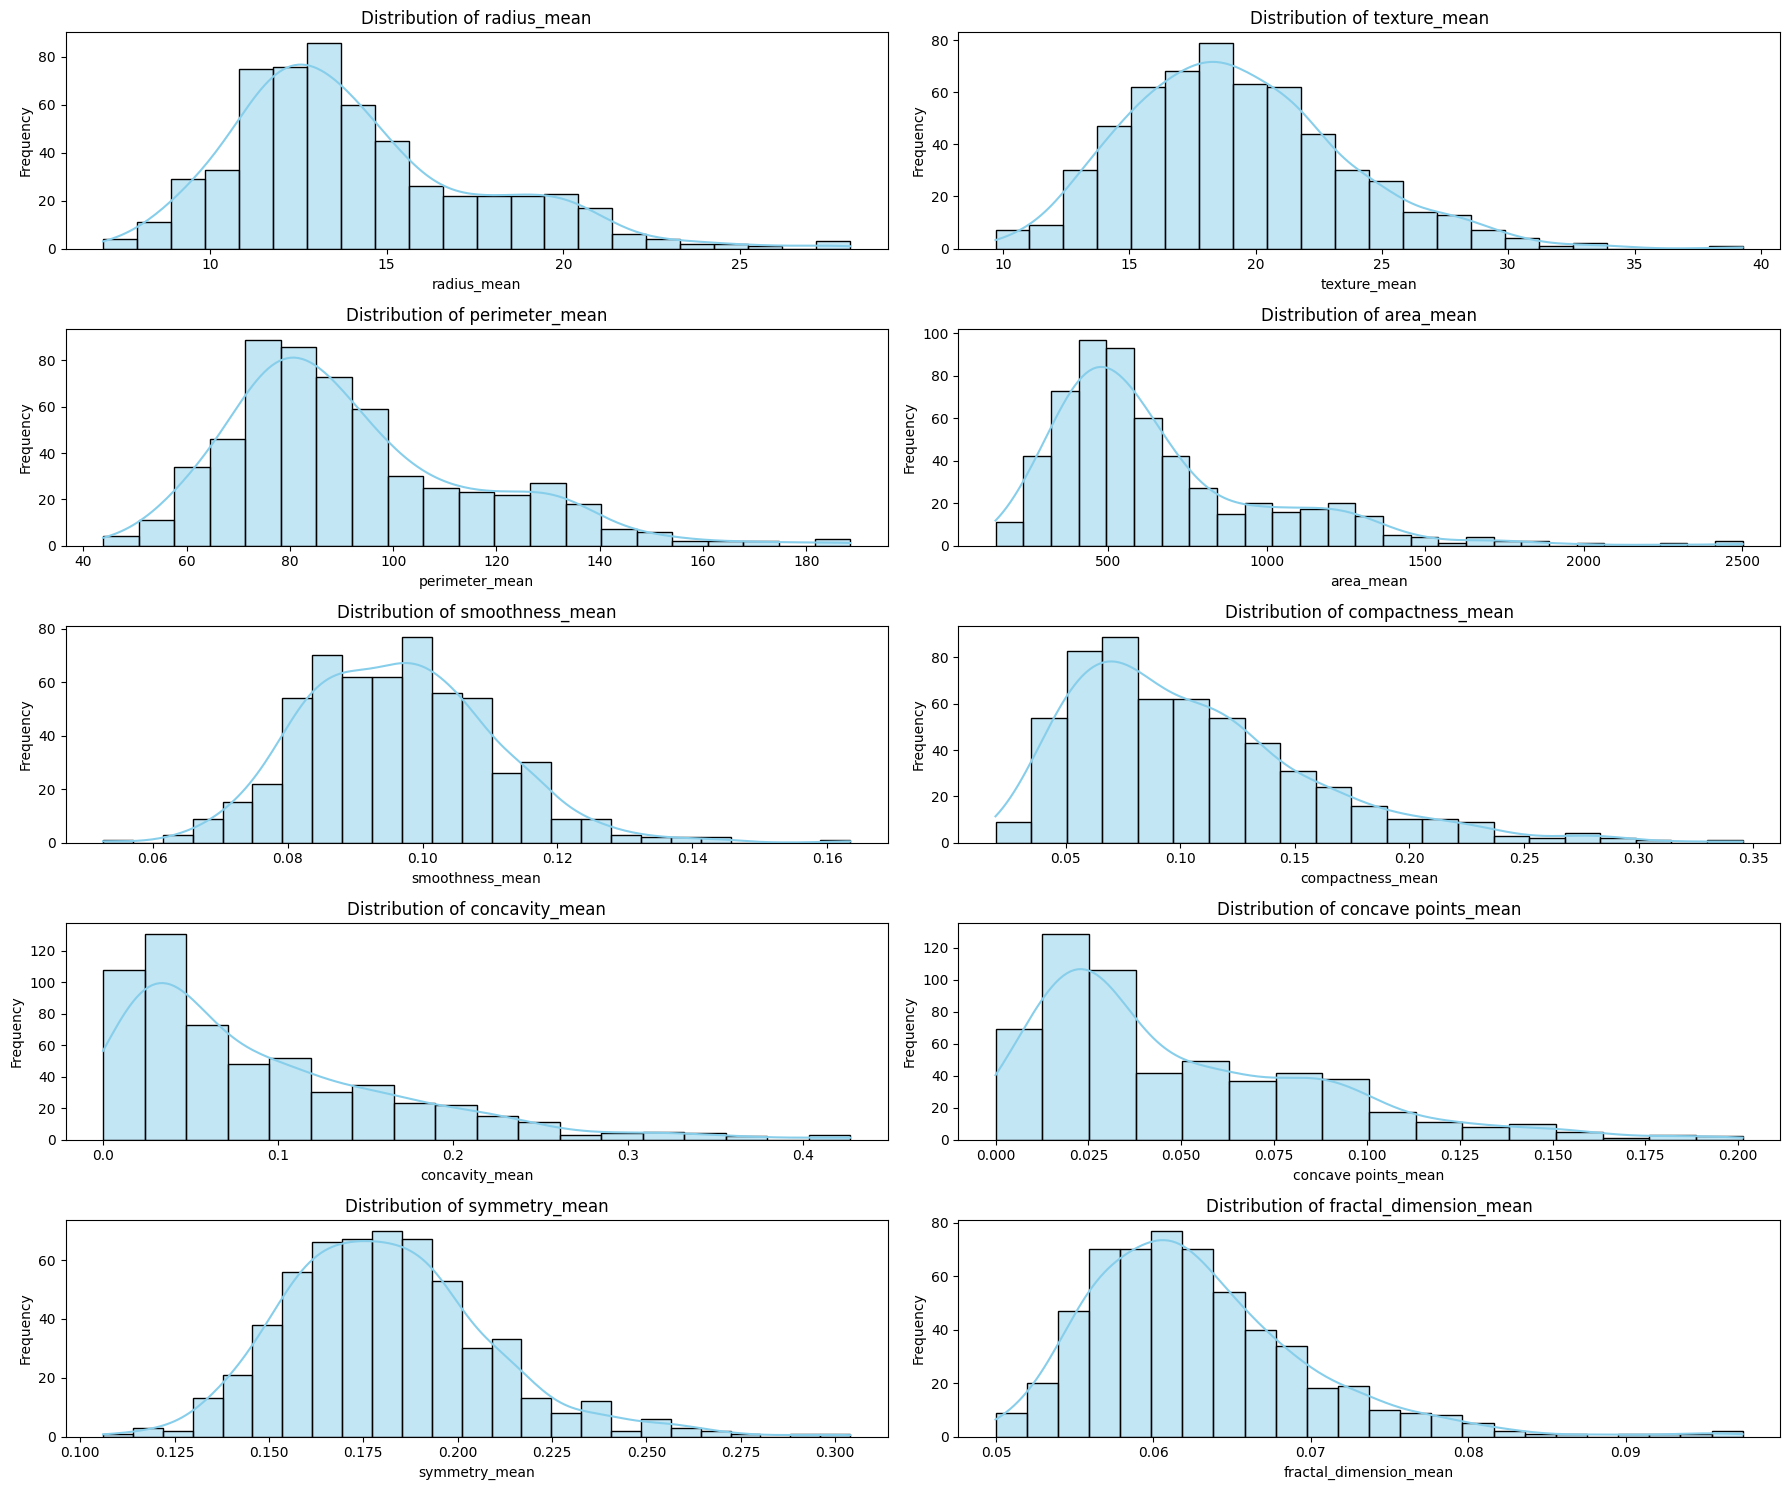

In [9]:
columns_to_plot = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

plt.figure(figsize=(18, 15))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

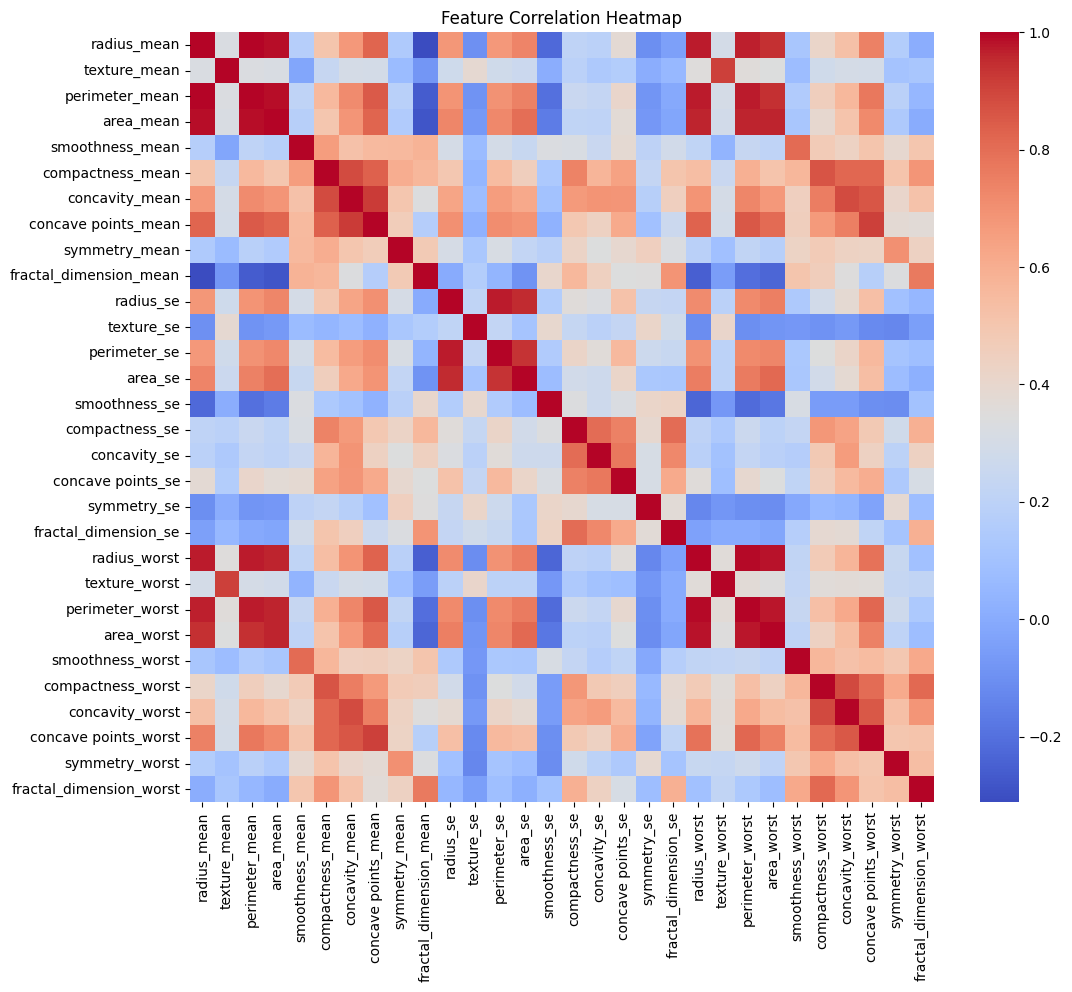

In [10]:
numeric_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [11]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (455, 30), y_train shape: (455,)
X_test shape: (114, 30), y_test shape: (114,)


In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Predict probabilities

In [14]:
y_pred_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]

Predict class labels (using default threshold of 0.5)

In [15]:
y_pred = (y_pred_proba > 0.5).astype(int)

Convert y_test to numerical labels

In [16]:
y_test_numeric = y_test.map({'B': 0, 'M': 1})

In [17]:
cm = confusion_matrix(y_test_numeric, y_pred)
precision = precision_score(y_test_numeric, y_pred, pos_label=1)
recall = recall_score(y_test_numeric, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)

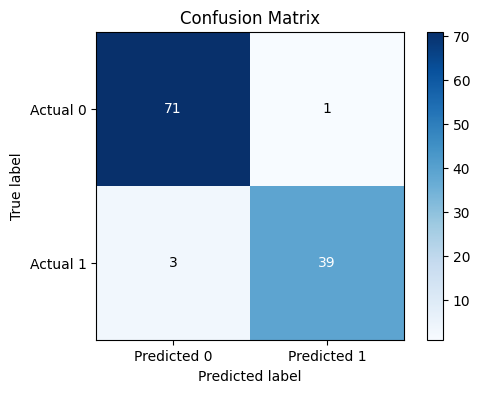

Precision: 0.975
Recall: 0.9285714285714286
ROC-AUC Score: 0.996031746031746


In [18]:
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()

print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC Score:", roc_auc)

In [19]:
y_test_numeric = y_test.map({'B': 0, 'M': 1})

best_threshold = 0
best_f1 = 0

thresholds = np.arange(0.1, 1, 0.05)
for threshold in thresholds:
    y_pred = (logreg_model.predict_proba(X_test_scaled)[:, 1] > threshold).astype(int)
    f1 = f1_score(y_test_numeric, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.4f}")

Best threshold: 0.25
Best F1-score: 0.9762
